In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1


In [2]:
import pandas as pd
csv_path = "/root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1/marketing_campaign.csv"
df = pd.read_csv(csv_path)
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [3]:
df = pd.read_csv(csv_path, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Remove rows with null values in Income
df = df.dropna(subset=['Income'])

# Verify that null values have been removed
print("Remaining null values in Income:", df['Income'].isnull().sum())

Remaining null values in Income: 0


In [6]:
# Check the new dataset size
print("New dataset shape:", df.shape)

New dataset shape: (2216, 29)


In [7]:
# Convert Dt_Customer column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Find the most recent registration date in the dataset
latest_date = df['Dt_Customer'].max()
print("Most recent registration date in the dataset:", latest_date)

Most recent registration date in the dataset: 2014-06-29 00:00:00


<ipython-input-7-6550958fc9e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [8]:
# Create the Age column based on the year 2014
df['Age'] = 2014 - df['Year_Birth']

# Remove the original Year_Birth column
df.drop(columns=['Year_Birth'], inplace=True)
print(df[['Age']].describe())

               Age
count  2216.000000
mean     45.179603
std      11.985554
min      18.000000
25%      37.000000
50%      44.000000
75%      55.000000
max     121.000000


<ipython-input-8-e203297b5ed4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2014 - df['Year_Birth']
<ipython-input-8-e203297b5ed4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Year_Birth'], inplace=True)


In [9]:
# Remove customers with Age > 100 years
df = df[df['Age'] <= 100]

# Verify that there are no more outliers
print("Customers with Age > 100 after cleaning:", df[df['Age'] > 100].shape[0])

Customers with Age > 100 after cleaning: 0


In [10]:
# Count unique values in the Education column
print(df['Education'].value_counts())

Education
Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


In [11]:
# Create a binary column for Education
df['Education_Basic'] = df['Education'].apply(lambda x: 1 if x == 'Basic' else 0)

# Remove the original Education column
df.drop(columns=['Education'], inplace=True)
print(df['Education_Basic'].value_counts())

Education_Basic
0    2159
1      54
Name: count, dtype: int64


<ipython-input-11-a11d0806ad25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Basic'] = df['Education'].apply(lambda x: 1 if x == 'Basic' else 0)
<ipython-input-11-a11d0806ad25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Education'], inplace=True)


In [12]:
# Create a binary column for Marital Status
df['Marital_Single'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Single', 'Alone', 'Widow'] else 0)

# Remove the original Marital_Status column
df.drop(columns=['Marital_Status'], inplace=True)
print(df['Marital_Single'].value_counts())

Marital_Single
0    1664
1     549
Name: count, dtype: int64


<ipython-input-12-68995c8c4be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Single'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Single', 'Alone', 'Widow'] else 0)
<ipython-input-12-68995c8c4be3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Marital_Status'], inplace=True)


In [13]:
# Create a new column with the total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Remove the original columns
df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
print(df['Total_Children'].value_counts())

Total_Children
1    1115
0     632
2     416
3      50
Name: count, dtype: int64


<ipython-input-13-87c4f45f6459>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Children'] = df['Kidhome'] + df['Teenhome']
<ipython-input-13-87c4f45f6459>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)


In [14]:
# Create a new column with the total spending
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

<ipython-input-14-e6bd19601273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
<ipython-input-14-e6bd19601273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)


In [15]:
# Create a new column with the total purchase
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], inplace=True)

<ipython-input-15-14e09b68f87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
<ipython-input-15-14e09b68f87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], inplace=True)


In [16]:
# Create a new column for accepted campaigns
df['Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], inplace=True)
print(df[['Accepted_Campaigns']].head(20))

    Accepted_Campaigns
0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    1
11                   0
12                   0
13                   0
14                   0
15                   2
16                   0
17                   0
18                   1
19                   0
20                   0


In [17]:
# Remove ID, Z_CostContact, Z_Revenue columns
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Complain'], inplace=True)

In [18]:
print(df.columns)

Index(['Income', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'Response', 'Age', 'Education_Basic',
       'Marital_Single', 'Total_Children', 'Total_Spending', 'Total_Purchases',
       'Accepted_Campaigns'],
      dtype='object')


Average accepted campaigns per customer: 0.30
📊 Total number of accepted campaigns: 660
Number of customers who responded to the last campaign: 333
📊 Number of customers who did NOT accept the last campaign: 1880
---------------------


<ipython-input-19-3abf051ea939>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Accepted_Campaigns'], palette="coolwarm")


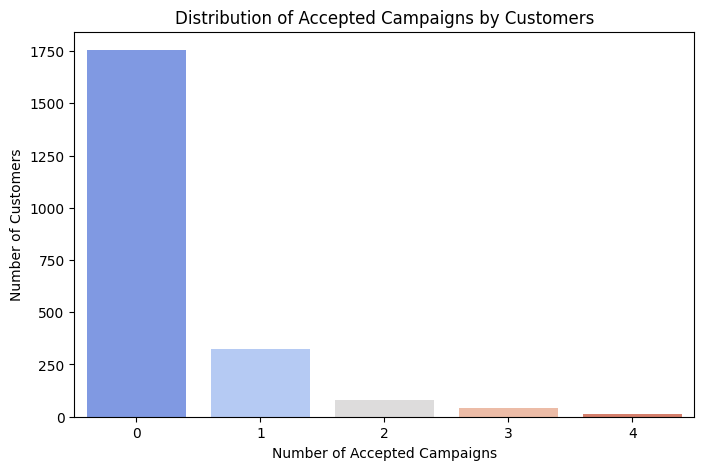

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average number of accepted campaigns per customer
accepted_campaigns_mean = df['Accepted_Campaigns'].mean()
print(f"Average accepted campaigns per customer: {accepted_campaigns_mean:.2f}")

# Calculate the total number of accepted campaigns across all customers
total_accepted_campaigns = df['Accepted_Campaigns'].sum()
print(f"📊 Total number of accepted campaigns: {total_accepted_campaigns}")

# Count how many customers responded to the last campaign (Response = 1)
total_response_last_campaign = df['Response'].sum()
print(f"Number of customers who responded to the last campaign: {total_response_last_campaign}")

# Count how many customers not responded to the last campaign (Response = 0)
num_clients_accepted_last_campaign = df['Response'].sum()
num_clients_not_accepted_last_campaign = len(df) - num_clients_accepted_last_campaign
print(f"📊 Number of customers who did NOT accept the last campaign: {num_clients_not_accepted_last_campaign}")

print("---------------------")

# Distribution of Accepted Campaigns by Customers
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Accepted_Campaigns'], palette="coolwarm")
plt.title("Distribution of Accepted Campaigns by Customers")
plt.xlabel("Number of Accepted Campaigns")
plt.ylabel("Number of Customers")
plt.show()


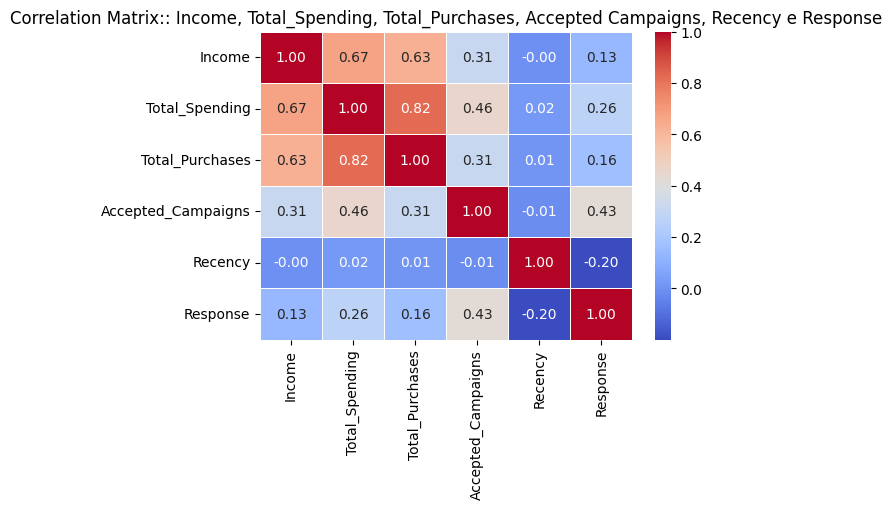

In [20]:
# Calculate the correlation matrix for Income, Total_Spending, Total_Purchases, Accepted_Campaigns, Recency, and Response
correlation_matrix = df[['Income', 'Total_Spending', 'Total_Purchases', 'Accepted_Campaigns', 'Recency', 'Response']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix:: Income, Total_Spending, Total_Purchases, Accepted Campaigns, Recency e Response")
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

# Define the normalizer
scaler = StandardScaler()

# Copy the original dataset to avoid permanent modifications
df_scaled = df.copy()

# Select only continuous numerical features for standardization (excluding Response)
numerical_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Accepted_Campaigns', 'Recency']

# Apply standardization
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the newly standardized values
print(df_scaled[numerical_features].describe())


             Income  Total_Spending  Total_Purchases  Accepted_Campaigns  \
count  2.213000e+03    2.213000e+03     2.213000e+03        2.213000e+03   
mean  -5.056958e-17   -4.013459e-17     9.391493e-17       -4.013459e-17   
std    1.000226e+00    1.000226e+00     1.000226e+00        1.000226e+00   
min   -2.006386e+00   -9.994508e-01    -1.744293e+00       -4.390416e-01   
25%   -6.749549e-01   -8.932007e-01    -9.113234e-01       -4.390416e-01   
50%   -3.430598e-02   -3.486691e-01    -7.835361e-02       -4.390416e-01   
75%    6.455518e-01    7.320934e-01     7.546162e-01       -4.390416e-01   
max    2.440836e+01    3.184146e+00     2.698212e+00        5.449437e+00   

            Recency  
count  2.213000e+03  
mean  -4.254266e-17  
std    1.000226e+00  
min   -1.693697e+00  
25%   -8.642613e-01  
50%   -2.654845e-04  
75%    8.637304e-01  
max    1.727726e+00  


In [22]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Customer_Age"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

In [23]:
from sklearn.decomposition import PCA
import numpy as np
# Instantiate PCA with 2 principal components
pca = PCA(n_components=2, random_state=42)

# Apply PCA only on standardized numerical features
df_pca = pca.fit_transform(df_scaled[numerical_features])

# Create a DataFrame with principal components
df_pca_final = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

expl_var_ratio = pca.explained_variance_ratio_
print("Explained variance by PC1 and PC2:", expl_var_ratio)
print("Cumulative explained variance:", np.cumsum(expl_var_ratio))


# Loadings (PCA coefficients)
loadings = pd.DataFrame(pca.components_, columns=numerical_features, index=['PC1', 'PC2'])

print("PCA Loadings (Contribution of each feature to PC1 and PC2):")
print(loadings)


Explained variance by PC1 and PC2: [0.52993088 0.20030156]
Cumulative explained variance: [0.52993088 0.73023244]
PCA Loadings (Contribution of each feature to PC1 and PC2):
       Income  Total_Spending  Total_Purchases  Accepted_Campaigns   Recency
PC1  0.503427        0.572292         0.542465            0.353185  0.005991
PC2 -0.004980        0.020391         0.017512           -0.069755  0.997190


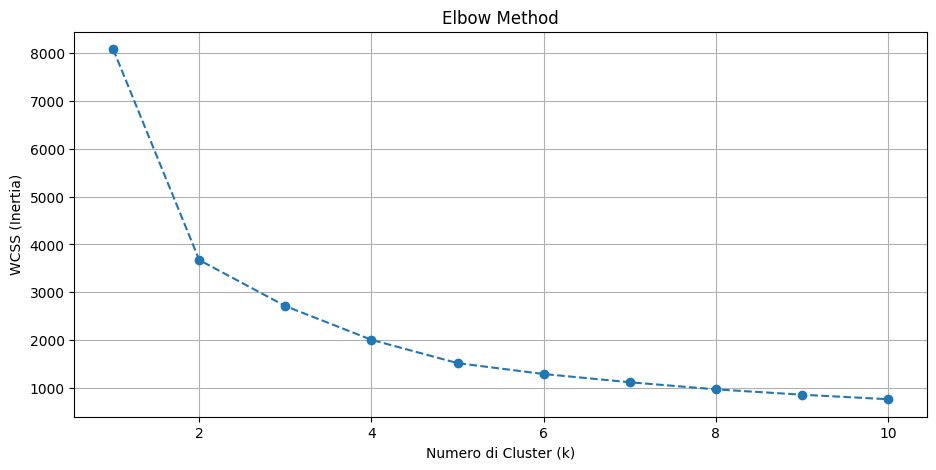

In [24]:
from sklearn.cluster import KMeans

# List to store inertia (WCSS) for different k values
wcss = []

# Test different values of k (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_final[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

# Elbow method plot to find the optimal number of clusters
plt.figure(figsize=(11,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.grid()
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

# Test k=3 and k=4 after standardization and PCA
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca_final[['PC1', 'PC2']])
    silhouette_avg = silhouette_score(df_pca_final[['PC1', 'PC2']], labels)
    print(f"Silhouette Score per k={k}: {silhouette_avg:.4f}")

# Apply K-Means with k=4
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca_final['Cluster'] = kmeans.fit_predict(df_pca_final[['PC1', 'PC2']])
centroids = kmeans.cluster_centers_

# Display the cluster centroids
print("Cluster centroids:\n", centroids)

Silhouette Score per k=3: 0.4123
Silhouette Score per k=4: 0.3996
Cluster centroids:
 [[ 1.66325487  0.00328781]
 [-1.2090778  -0.86345983]
 [-1.16110509  0.89971296]]


<ipython-input-26-edaea9799adc>:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, c='red', edgecolors='black', label="Centroidi")


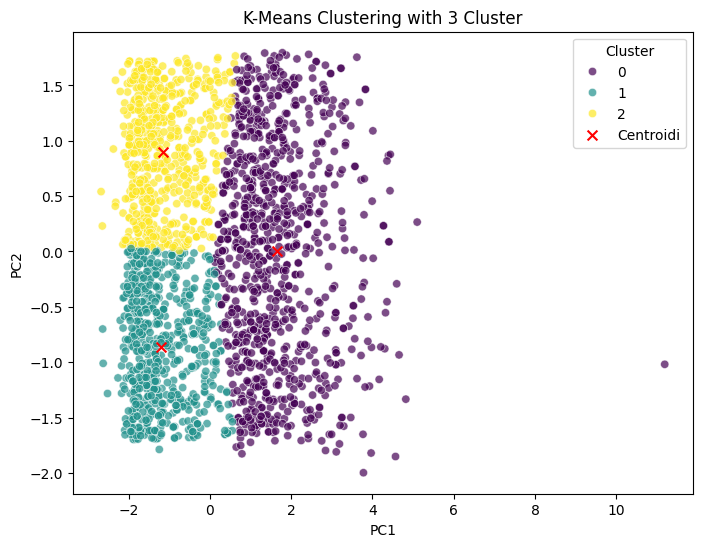

Silhouette Score: 0.4962


In [26]:
# Plot the clusters with centroids
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca_final['PC1'], y=df_pca_final['PC2'], hue=df_pca_final['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, c='red', edgecolors='black', label="Centroidi")
plt.title(f'K-Means Clustering with {3} Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

silhouette_avg = silhouette_score(df_pca_final, df_pca_final['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Cluster Analysis:


,Income,Total_Spending,Total_Purchases,Accepted_Campaigns,Recency,Response
Cluster,,,,,,
0.0,51300.366228,597.682018,12.422149,0.270833,49.742325,0.140351
1.0,52302.445469,615.663594,12.694316,0.307220,48.754224,0.152074
2.0,52793.875000,616.219551,12.676282,0.331731,48.203526,0.166667


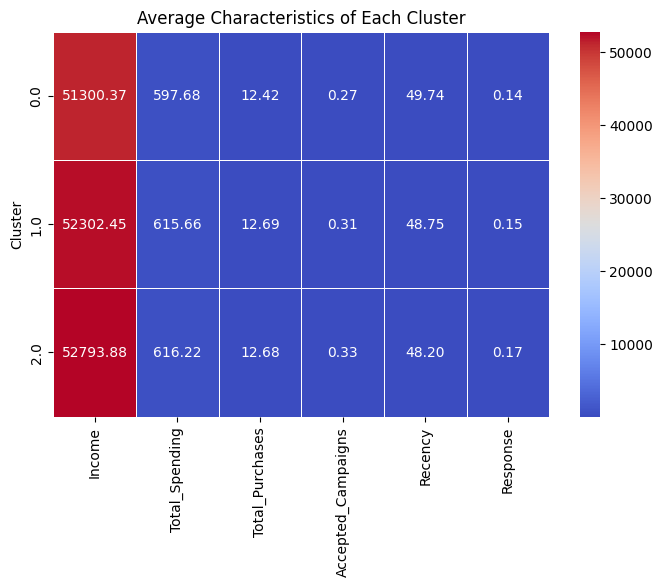

In [27]:
# Add clusters to the original dataset
df['Cluster'] = df_pca_final['Cluster']

# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster')[['Income', 'Total_Spending', 'Total_Purchases', 'Accepted_Campaigns', 'Recency', 'Response']].mean()

# Display the table with the average characteristics of each cluster
print("Cluster Analysis:")
display(cluster_analysis)

# Create a heatmap to visualize differences between clusters
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_analysis, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Average Characteristics of Each Cluster")
plt.show()
